# Data Pre-Processing

In [1]:
import math
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [2]:
start = datetime.datetime(2012, 9, 30)
end = datetime.datetime(2022, 9, 30)
df_TSM = web.DataReader('TSM', 'yahoo', start, end) 
TSM = df_TSM
TSM = TSM.reset_index()
TSM['Date'] = pd.to_datetime(TSM['Date'])

# corresponding csv file is saved in an ouput directory 
df_TSM.to_csv('data/TSM_new_l.csv')
TSM

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090
...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999


In [3]:
df_TSM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858
2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703
2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123
2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448
2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090
...,...,...,...,...,...,...
2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002
2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999
2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997


In [4]:
df_fama3 = pd.read_csv("data/F-F_Research_Data_Factors_daily.csv",skiprows=0)

In [5]:
df_fama3.tail()

,Date,Mkt-RF,SMB,HML,RF
25331,20220926,-1.02,0.17,-0.75,0.009
25332,20220927,-0.05,0.63,-0.93,0.009
25333,20220928,2.15,0.90,-0.33,0.009
25334,20220929,-2.17,-0.46,0.86,0.009
25335,20220930,-1.43,0.50,0.27,0.009


In [6]:
df_fama3.reset_index(drop = True, inplace= True)

In [7]:
df_fama3 = df_fama3[(df_fama3.Date > 20120930) & (df_fama3.Date <= 20220930)]

In [8]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
22819,20121001,0.26,0.08,0.22,0.000
22820,20121002,0.10,-0.15,0.25,0.000
22821,20121003,0.36,-0.64,-0.03,0.000
22822,20121004,0.76,-0.21,0.70,0.000
22823,20121005,-0.03,-0.16,0.23,0.000
...,...,...,...,...,...
25331,20220926,-1.02,0.17,-0.75,0.009
25332,20220927,-0.05,0.63,-0.93,0.009
25333,20220928,2.15,0.90,-0.33,0.009
25334,20220929,-2.17,-0.46,0.86,0.009


In [9]:
df_fama3.shape

(2517, 5)

In [10]:
df_fama3.index = range(0, 2517, 1)

In [11]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
0,20121001,0.26,0.08,0.22,0.000
1,20121002,0.10,-0.15,0.25,0.000
2,20121003,0.36,-0.64,-0.03,0.000
3,20121004,0.76,-0.21,0.70,0.000
4,20121005,-0.03,-0.16,0.23,0.000
...,...,...,...,...,...
2512,20220926,-1.02,0.17,-0.75,0.009
2513,20220927,-0.05,0.63,-0.93,0.009
2514,20220928,2.15,0.90,-0.33,0.009
2515,20220929,-2.17,-0.46,0.86,0.009


In [12]:
df_TSM = pd.read_csv('data/TSM_new_l.csv')

In [13]:
df_TSM.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090


In [14]:
df_TSM.shape

(2517, 7)

In [15]:
df_TSM['MktRF'] = df_fama3['Mkt-RF']
df_TSM['SMB'] = df_fama3['SMB']
df_TSM['HML'] = df_fama3['HML']
df_TSM['RF'] = df_fama3['RF']

In [16]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858,0.26,0.08,0.22,0.000
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009


In [17]:
df_TSM['Yest_Close']  = df_TSM['Adj Close'].shift(1)

#Yesterday's Close Price

In [18]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858,0.26,0.08,0.22,0.000,NaN
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000,11.899858
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000,11.974703
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000,12.012123
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000,12.094448
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009,73.870003
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009,73.010002
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009,73.029999
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009,72.129997


In [19]:
df_TSM['stock_return'] = (df_TSM['Adj Close']-df_TSM['Yest_Close'])/(df_TSM['Yest_Close'])

In [20]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858,0.26,0.08,0.22,0.000,NaN,NaN
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000,11.899858,0.006290
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000,11.974703,0.003125
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000,12.012123,0.006853
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000,12.094448,-0.005569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009,73.870003,-0.011642
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009,73.010002,0.000274
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009,73.029999,-0.012324
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009,72.129997,-0.039512


In [21]:
temp = df_TSM.drop(df_TSM.index[[0,1]])

In [22]:
temp.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.0,11.974703,0.003125
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.0,12.012123,0.006853
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.0,12.094448,-0.005569
5,2012-10-08,15.840000,15.480000,15.840000,15.530000,12827100.0,11.622946,-0.36,-0.24,0.19,0.0,12.027090,-0.033603
6,2012-10-09,15.450000,15.240000,15.430000,15.360000,9900400.0,11.495713,-1.05,-0.31,0.33,0.0,11.622946,-0.010947


In [23]:
df_TSM.reset_index(drop = True, inplace= True)

In [24]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899858,0.26,0.08,0.22,0.000,NaN,NaN
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000,11.899858,0.006290
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000,11.974703,0.003125
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000,12.012123,0.006853
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000,12.094448,-0.005569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009,73.870003,-0.011642
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009,73.010002,0.000274
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009,73.029999,-0.012324
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009,72.129997,-0.039512


In [25]:
df_TSM = df_TSM[df_TSM['Yest_Close'].notna()]
df_TSM = df_TSM[df_TSM['MktRF'].notna()]
df_TSM = df_TSM[df_TSM['SMB'].notna()]
df_TSM = df_TSM[df_TSM['HML'].notna()]
df_TSM = df_TSM[df_TSM['RF'].notna()]

In [26]:
df_TSM

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,0.10,-0.15,0.25,0.000,11.899858,0.006290
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012123,0.36,-0.64,-0.03,0.000,11.974703,0.003125
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094448,0.76,-0.21,0.70,0.000,12.012123,0.006853
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027090,-0.03,-0.16,0.23,0.000,12.094448,-0.005569
5,2012-10-08,15.840000,15.480000,15.840000,15.530000,12827100.0,11.622946,-0.36,-0.24,0.19,0.000,12.027090,-0.033603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2022-09-26,74.190002,72.919998,73.470001,73.010002,13441500.0,73.010002,-1.02,0.17,-0.75,0.009,73.870003,-0.011642
2513,2022-09-27,74.040001,72.349998,73.510002,73.029999,12430600.0,73.029999,-0.05,0.63,-0.93,0.009,73.010002,0.000274
2514,2022-09-28,72.290001,70.699997,71.110001,72.129997,12943600.0,72.129997,2.15,0.90,-0.33,0.009,73.029999,-0.012324
2515,2022-09-29,70.680000,68.480003,70.519997,69.279999,16120300.0,69.279999,-2.17,-0.46,0.86,0.009,72.129997,-0.039512


In [27]:
df_TSM.to_csv("data/TSM_fama3_new.csv", index=False)

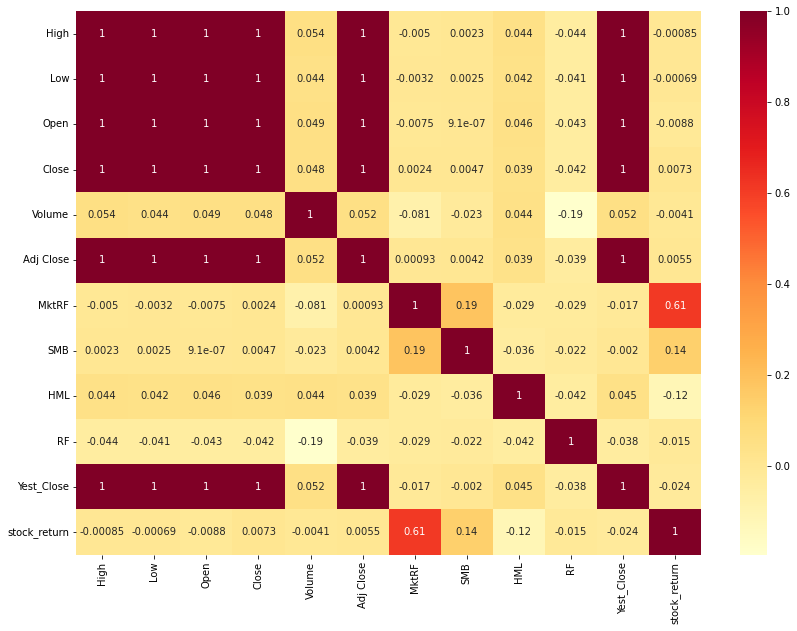

In [28]:
x = df_TSM.iloc[1:, 1:]
y = df_TSM.iloc[:, -2]
corrmat = df_TSM.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,10))
hm = sns.heatmap(df_TSM[top_corr_features].corr(), annot = True, cmap = "YlOrRd")